In [1]:
#To cleanup:
#average/median play time, forever and two weeks
#metacritic score-Sam
#user score(all hentai) Esitamated owners-Edmon
#price-Greg
#tags
#positive 
#if you play longer on average, do you have more positive reviews?

In [52]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
game_df = pd.read_csv("games.csv")
game_df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [24]:
game_df.shape

(74689, 39)

In [5]:
game_df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [77]:
estimated_df = game_df.sort_values(by=["Estimated owners"], ascending=False)
grouped_data = estimated_df.groupby("Estimated owners")
grouped_data.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
7030,1063730,New World,"Sep 28, 2021",50000000 - 100000000,16688,0,39.99,0,"Explore a thrilling, open-world MMO filled wit...","['English', 'French', 'Italian', 'German', 'Sp...",...,607,3093,259,Amazon Games,Amazon Games,"Multi-player,MMO,PvP,Online PvP,Co-op,Online C...","Action,Adventure,Massively Multiplayer,RPG","Massively Multiplayer,Open World,MMORPG,RPG,Ad...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
46158,730,Counter-Strike: Global Offensive,"Aug 21, 2012",50000000 - 100000000,825215,0,0.00,1,Counter-Strike: Global Offensive (CS: GO) expa...,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...",...,777,6357,253,"Valve,Hidden Path Entertainment",Valve,"Multi-player,Steam Achievements,Full controlle...","Action,Free to Play","FPS,Shooter,Multiplayer,Competitive,Action,Tea...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/8...
30583,440,Team Fortress 2,"Oct 10, 2007",50000000 - 100000000,107702,0,0.00,1,The most fun you can have online - PC Gamer Is...,"['English', 'Danish', 'Dutch', 'Finnish', 'Fre...",...,2299,370,694,Valve,Valve,"Multi-player,Cross-Platform Multiplayer,Steam ...","Action,Free to Play","Free to Play,Hero Shooter,Multiplayer,FPS,Shoo...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
8885,578080,PUBG: BATTLEGROUNDS,"Dec 21, 2017",50000000 - 100000000,275374,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","['English', 'Korean', 'Simplified Chinese', 'F...",...,790,7134,152,"KRAFTON, Inc.","KRAFTON, Inc.","Multi-player,PvP,Online PvP,Stats,Remote Play ...","Action,Adventure,Free to Play,Massively Multip...","Survival,Shooter,Multiplayer,Battle Royale,FPS...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
43468,1174180,Red Dead Redemption 2,"Dec 5, 2019",5000000 - 10000000,26520,17,29.99,0,"America, 1899. Arthur Morgan and the Van der L...","['English', 'French', 'Italian', 'German', 'Sp...",...,619,1811,669,Rockstar Games,Rockstar Games,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Action,Adventure","Open World,Adventure,Story Rich,Western,Action...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74619,2441610,Debug Quest,"Jun 12, 2023",0 - 0,0,0,0.00,0,About the game Debug Quest is an exciting game...,['Korean'],...,0,0,0,AveoGames,AveoGames,Single-player,"Adventure,Casual,Free to Play,Strategy,Early A...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
69796,2298500,Feudal Fantasy Incremental,"Feb 17, 2023",0 - 0,0,0,1.34,0,Feudal Fantasy Incremental is active increment...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Luminosity Interactive,Luminosity Interactive,Single-player,"Casual,Indie,Simulation,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
70637,2319830,Hentai Festival,"Mar 9, 2023",0 - 0,0,0,0.59,0,Hentai Festival is a relaxing puzzle game. Wit...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,"GentleDriver,Puzzle L Porject",Hentai works,"Single-player,Steam Achievements,Steam Cloud","Casual,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
70690,2338420,Cult of Cards Playtest,"Mar 11, 2023",0 - 0,0,0,0.00,0,NaN,[],...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
estimated_df[["Name","Estimated owners","Developers","Publishers"]]

,Name,Estimated owners,Developers,Publishers
7030,New World,50000000 - 100000000,Amazon Games,Amazon Games
46158,Counter-Strike: Global Offensive,50000000 - 100000000,"Valve,Hidden Path Entertainment",Valve
30583,Team Fortress 2,50000000 - 100000000,Valve,Valve
8885,PUBG: BATTLEGROUNDS,50000000 - 100000000,"KRAFTON, Inc.","KRAFTON, Inc."
43468,Red Dead Redemption 2,5000000 - 10000000,Rockstar Games,Rockstar Games
...,...,...,...,...
6548,Ragnarok: The Lost Memories,0 - 0,Gravity Neocyon,Gravity Interactive
67011,Robbie,0 - 0,Alfamonk,Alfamonk
67012,Slaughter Horse 2,0 - 0,Catfood McFly,Catsmeat Studios
67013,The Last Job,0 - 0,DefinitelyNotScaryGames,DefinitelyNotScaryGames


In [48]:
# Convert the "Estimated owners" column to numeric type, convert non-numeric values to NaN
estimated_df["Estimated owners"] = pd.to_numeric(estimated_df["Estimated owners"], errors="coerce")

# Calculate the mean of "Estimated owners" for each genre
genre_estimated_df = estimated_df.groupby("Genres")["Estimated owners"].mean()

# Display the resulting DataFrame
genre_estimated_df.head()

Genres
Accounting                                                                                                                                                                     2.000000e+04
Accounting,Animation & Modeling,Audio Production,Design & Illustration,Education,Photo Editing,Software Training,Utilities,Video Production,Web Publishing                     2.000000e+04
Accounting,Animation & Modeling,Audio Production,Design & Illustration,Education,Photo Editing,Software Training,Utilities,Video Production,Web Publishing,Game Development    7.500015e+10
Accounting,Design & Illustration,Education,Utilities,Web Publishing,Game Development                                                                                           0.000000e+00
Accounting,Education,Software Training,Utilities,Early Access                                                                                                                  2.000000e+04
Name: Estimated owners, dtype: float64

In [55]:
# Group the data by "Developers" and calculate the mean of "Estimated owners" for each developer
developers_estimated_df = estimated_df.groupby("Developers")["Estimated owners"].mean()

# Sort the data in descending order of mean "Estimated owners" for each developer
developers_estimated_df = developers_estimated_df.sort_values(ascending=False)

developers_estimated_df

Developers
Valve,Hidden Path Entertainment                                                5.000000e+16
Amazon Games                                                                   5.000000e+16
KRAFTON, Inc.                                                                  2.500250e+16
Valve                                                                          4.746720e+15
Blue Mammoth Games                                                             2.000000e+15
                                                                                   ...     
Charlotte Broccard,Etienne Frank,Guillaume Mezino,Mario von Rickenbach         0.000000e+00
Chase Yamaguchi,Eric Bennatte,Patwoneque Bradley,Frangelica Terry,Kasey Ray    0.000000e+00
Chase Yamaguchi,Jettsen David                                                  0.000000e+00
Puffin Forest                                                                  0.000000e+00
NNSOFT                                                               

In [71]:
owner_prices_df = top_scores_df.groupby(["Estimated owners"])["Price"].mean().sort_values(ascending=False)

# Display the resulting DataFrame
print(owner_prices_df.head(25))

Estimated owners
2000000 - 5000000        21.005357
5000000 - 10000000       20.607308
1000000 - 2000000        19.152300
500000 - 1000000         17.240446
200000 - 500000          15.526131
100000 - 200000          13.609074
50000 - 100000           13.514932
10000000 - 20000000      13.367917
50000000 - 100000000     13.330000
0 - 20000                13.254480
20000 - 50000            13.147241
20000000 - 50000000      11.161667
0 - 0                     7.652857
100000000 - 200000000     0.000000
Name: Price, dtype: float64


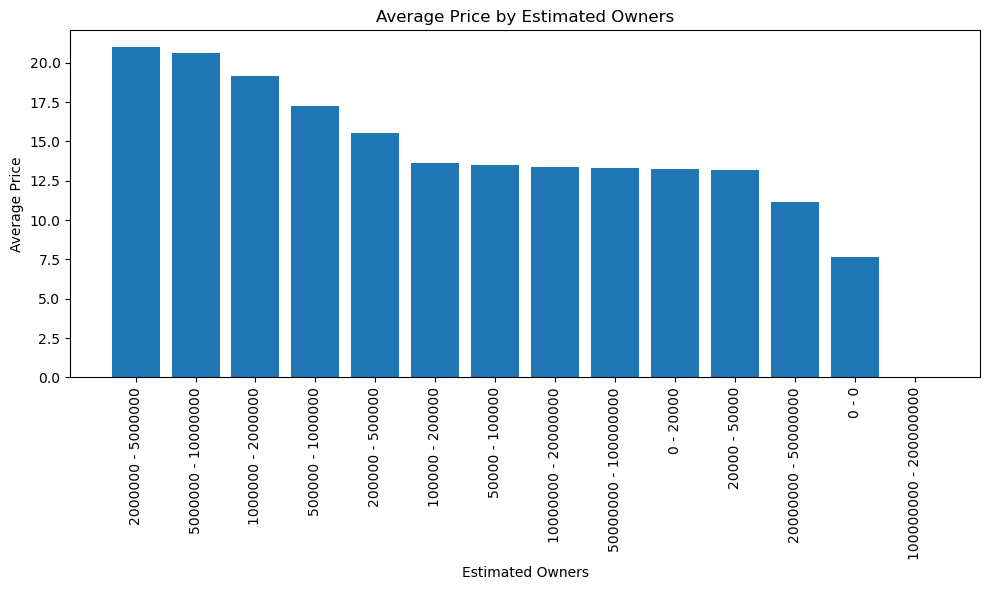

In [76]:
# Calculate the average price by "Estimated owners" and sort the DataFrame in descending order
owner_prices_df = top_scores_df.groupby(["Estimated owners"])["Price"].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(owner_prices_df.index, owner_prices_df.values)
plt.xlabel("Estimated Owners")
plt.ylabel("Average Price")
plt.title("Average Price by Estimated Owners")
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [66]:
top_scores_df = game_df.sort_values(by="Metacritic score", ascending=False)
top_scores_df = top_scores_df[(top_scores_df["Metacritic score"])>0]
top_scores_df[["Name","Metacritic score","Positive","Negative"]]

,Name,Metacritic score,Positive,Negative
64935,Persona 5 Royal,97,3588,102
45752,Disco Elysium - The Final Cut,97,55250,3244
49557,Half-Life,96,73346,2619
36775,Half-Life 2,96,142368,3687
57205,Grand Theft Auto V,96,1171197,210154
...,...,...,...,...
30992,Rogue Warrior,29,782,388
11029,Fray: Reloaded Edition,27,1,49
31022,Postal III,24,1063,1749
5410,Flatout 3: Chaos & Destruction,23,506,2647


In [67]:
#metascore by estimated owner
owner_scores_df = top_scores_df.groupby(["Estimated owners"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Average playtime forever",ascending=False)
owner_scores_df.head(25)

C:\Users\edmon\AppData\Local\Temp\ipykernel_21980\3652253845.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  owner_scores_df = top_scores_df.groupby(["Estimated owners"])\


,Average playtime forever,Metacritic score
Estimated owners,,
100000000 - 200000000,37162.000000,90.000000
50000000 - 100000000,15944.000000,81.666667
20000000 - 50000000,7517.500000,83.500000
10000000 - 20000000,4403.291667,82.000000
5000000 - 10000000,3350.615385,80.634615
2000000 - 5000000,1940.668367,81.530612
1000000 - 2000000,1199.519164,78.456446
500000 - 1000000,823.601050,76.448819
200000 - 500000,526.330733,73.900156


In [ ]:
owner_scores_df = owner_scores_df.rename(index={'100000000 - 200000000': '100M - 200M',\
                                                '50000000 - 100000000': '50M - 100M',\
                                                '20000000 - 50000000': '20M - 50M', \
                                                '10000000 - 20000000': '10M - 20M',\
                                               '5000000 - 10000000': '5M - 10M',\
                                               '2000000 - 5000000': '2M - 5M',\
                                               '1000000 - 2000000': '1M - 2M',\
                                               '500000 - 1000000': '500K - 1M',\
                                               '200000 - 500000': '200K - 500K',\
                                               '100000 - 200000': '100K - 200K',\
                                               '50000 - 100000': '50K - 100K',\
                                               '20000 - 50000': '20K - 50K',\
                                               '0 - 20000': '0 - 20K'})

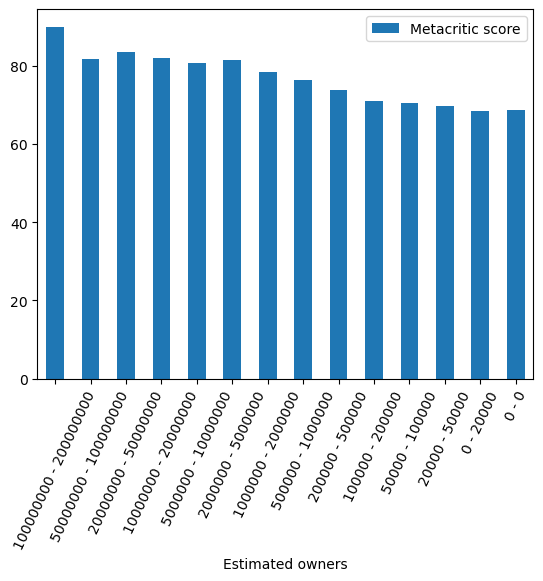

In [68]:
owner_scores_df.plot(kind='bar',y="Metacritic score")
plt.xticks(rotation=65)
plt.show()

In [57]:
# Group the data by both "Categories" and "Genres" and calculate the sum of "Estimated owners" for each combination
category_genre_estimated_df = estimated_df.groupby(["Categories", "Genres"])["Estimated owners"].sum()

# Sort the data in descending order based on the sum of "Estimated owners"
sorted_category_genre_estimated_df = category_genre_estimated_df.sort_values(ascending=False)

# Get the top 10 categories and genres with the most estimated owners
top_10_category_genre_estimated_df = sorted_category_genre_estimated_df.head(10)

# Convert the resulting Series to a DataFrame and reset the index for better readability
top_10_category_genre_df = top_10_category_genre_estimated_df.reset_index()

# Display the DataFrame with the top 10 categories and genres
print(top_10_category_genre_df)

                                          Categories  \
0  Multi-player,Co-op,Steam Trading Cards,Steam W...   
1  Multi-player,MMO,PvP,Online PvP,Co-op,Online C...   
2  Multi-player,Steam Achievements,Full controlle...   
3  Multi-player,PvP,Online PvP,Stats,Remote Play ...   
4  Multi-player,Cross-Platform Multiplayer,Steam ...   
5  Single-player,Multi-player,PvP,Online PvP,Co-o...   
6  Single-player,Multi-player,PvP,Online PvP,Co-o...   
7  Single-player,Multi-player,PvP,Online PvP,Shar...   
8  Single-player,Multi-player,PvP,Online PvP,Co-o...   
9  Single-player,Multi-player,Co-op,Online Co-op,...   

                                              Genres    Estimated owners  
0                       Action,Free to Play,Strategy  100000000200000000  
1         Action,Adventure,Massively Multiplayer,RPG   50000000100000000  
2                                Action,Free to Play   50000000100000000  
3  Action,Adventure,Free to Play,Massively Multip...   50000000100000000  
4       